In [5]:
import numpy as np
import matplotlib.pyplot as plb
import sklearn.linear_model as linearRegression
import pandas as pd

In [6]:
diabetes_data = pd.read_excel("~/Desktop/diabetes222.xlsx", sheet_name='Diabetes')
obesity_data = pd.read_excel("~/Desktop/diabetes222.xlsx", sheet_name= 'Obesity')

In [7]:
print(diabetes_data.columns)

print(obesity_data.columns)

Index(['YEAR', 'FIPS', 'COUNTY', 'STATE', '% DIABETIC'], dtype='object')
Index(['YEAR', 'FIPS', 'COUNTY', 'STATE', '% OBESE'], dtype='object')


In [8]:
merged_data = pd.merge(diabetes_data, obesity_data, on=['YEAR', 'FIPS', 'STATE', 'COUNTY'])
print(merged_data.head())

   YEAR  FIPS                     COUNTY    STATE  % DIABETIC  % OBESE
0  2018  1011             Bullock County  Alabama         9.4     18.7
1  2018  2068             Denali Borough   Alaska         6.8     18.9
2  2018  2105  Hoonah-Angoon Census Area   Alaska         7.3     19.4
3  2018  2195     Petersburg Census Area   Alaska         9.2     17.2
4  2018  2230       Skagway Municipality   Alaska         6.6     18.3


In [9]:
X = merged_data[['% OBESE']].values
y = merged_data[['% DIABETIC']].values

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [11]:
print("Coefficients:", model.coef_, model.intercept_)
from sklearn.metrics import r2_score
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

Coefficients: [[0.27828828]] [2.05598043]
R-squared: 0.148475949010916


In [12]:
predictions = model.predict(X)

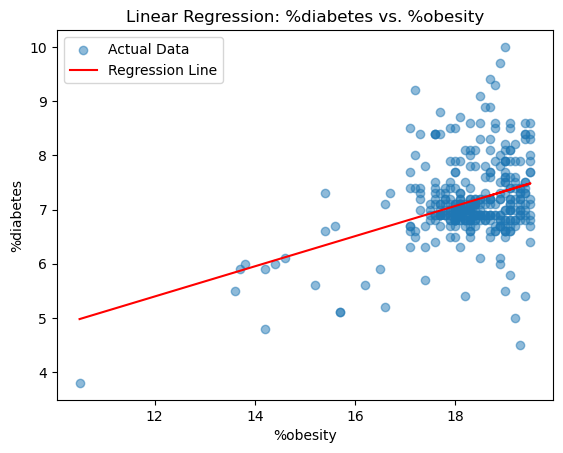

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X, y, label='Actual Data', alpha=0.5)  # alpha for any miscalc
plt.plot(X, predictions, color='red', label='Regression Line')
plt.xlabel('%obesity')
plt.ylabel('%diabetes')
plt.legend()
plt.title('Linear Regression: %diabetes vs. %obesity')
plt.show()
import matplotlib.pyplot as plt
import scipy.stats as stats

In [14]:
diabetes_data = pd.read_excel("~/Desktop/diabetes222.xlsx", sheet_name='Diabetes')
inactivity_data = pd.read_excel("~/Desktop/diabetes222.xlsx", sheet_name= 'Inactivity')

In [16]:
merged_data = pd.merge(diabetes_data, inactivity_data, on=['YEAR', 'FIPS', 'STATE', 'COUNTY'])
print (merged_data.head())

   YEAR  FIPS                  COUNTY    STATE  % DIABETIC  % INACTIVE
0  2018  1011          Bullock County  Alabama         9.4        17.0
1  2018  1029         Cleburne County  Alabama         8.3        19.3
2  2018  1037            Coosa County  Alabama         9.5        16.8
3  2018  1063           Greene County  Alabama        12.1        16.8
4  2018  2013  Aleutians East Borough   Alaska         9.3        19.2


In [17]:
X = merged_data[['% INACTIVE']].values
y = merged_data[['% DIABETIC']].values

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [19]:
predictions = model.predict(X)

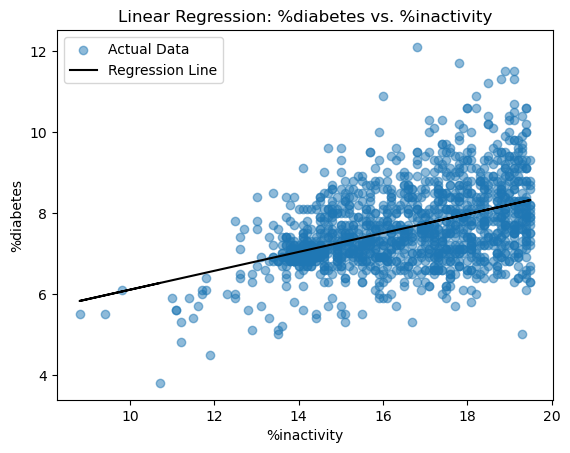

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X, y, label='Actual Data', alpha=0.5)  # alpha for any miscalc
plt.plot(X, predictions, color='black', label='Regression Line')
plt.xlabel('%inactivity')
plt.ylabel('%diabetes')
plt.legend()
plt.title('Linear Regression: %diabetes vs. %inactivity')
plt.show()

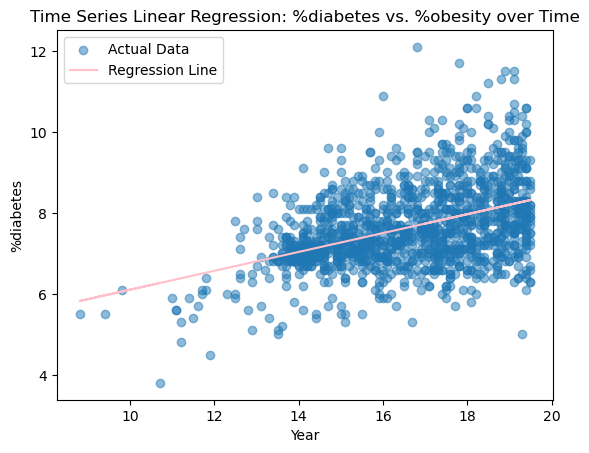

In [21]:
import matplotlib.pyplot as plt
merged_data.sort_values(by='YEAR', inplace=True)
X = merged_data[['% INACTIVE']].values
y = merged_data[['% DIABETIC']].values
plt.scatter(X, y, label='Actual Data', alpha=0.5)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
plt.plot(X, predictions, color='pink', label='Regression Line')
plt.xlabel('%obesity')
plt.ylabel('%diabetes')
plt.legend()
plt.title('Time Series Linear Regression: %diabetes vs. %obesity over Time')
plt.xlabel('Year')
plt.show()